In [5]:
#data collection
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
#data preprocessed
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent=dataset[['charges']]
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 16.7 MB/s eta 0:00:09
   - -------------------------------------- 3.9/150.0 MB 11.2 MB/s eta 0:00:14
   - -------------------------------------- 5.2/150.0 MB 10.6 MB/s eta 0:00:14
   - -------------------------------------- 6.3/150.0 MB 8.8 MB/s eta 0:00:17
   - -------------------------------------- 7.3/150.0 MB 7.3 MB/s eta 0:00:20
   -- ------------------------------------- 7.6/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 8.1/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.1/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.4/150.0 MB 5.1 MB/s eta 0:00:29
   -- ------------------------------------- 8.9/150.0 MB 4.3 MB/s eta 0:00:33
   -- ------------------------------------- 9.2/150.0 MB 4.1 MB/s eta 0:00:35
   -- ------------------------------------- 9.7/150.0 MB 3.9 MB/s et

In [11]:
import xgboost
from xgboost import XGBRegressor
Regressor=XGBRegressor(n_estimators=100, random_state=0)
Regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
ypred=Regressor.predict(xtest)

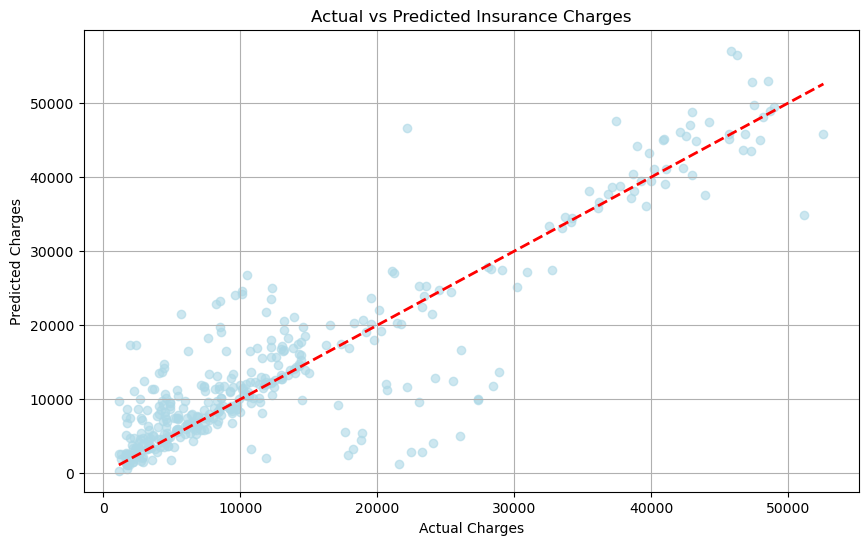

In [13]:
#plot creation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='lightblue', alpha =0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [14]:
#evaluation metrics
ypred=Regressor.predict(xtest)
from sklearn.metrics import r2_score
rscore=r2_score(ytest,ypred)
rscore

0.8073014616966248